## Introduction
This notebook is designed to become familiar with the shapes of different functions used to describe sorption behavior that can strongly influence transport processes in the subsurface.

First we import the libraries that we need

In [ ]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc as erfc
import math

## Isotherms
### Linear isotherm

Run the cell and use different values of $K_d$ to see how this changes the adsorption. 

interactive(children=(FloatSlider(value=0.5, description='Kd', max=1.0, min=0.01, step=0.01), Output()), _dom_…

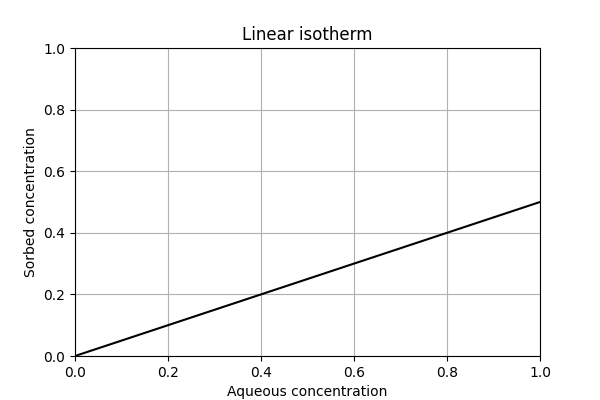

In [6]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_xlabel('Aqueous concentration')
ax.set_ylabel('Sorbed concentration')
ax.set_title('Linear isotherm')
 
# We will use numpy to build vector arrays to plot different isotherms. First define aqueous phase solute concentration
C = np.linspace(0, 1, 100)

def linear_isotherm(C, Kd):
    """
    Return an isotherm with a slope equal to Kd
    """
    return Kd*C
 
@widgets.interact(Kd=(0.01, 1, 0.01))
def update(Kd = 0.5):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(C, linear_isotherm(C, Kd), color='k')

What are the units of $K_d$? How does the retardation coefficient vary with changes in $K_d$? 

Assume the porosity is 0.3 and bulk density ($\rho_b$) is equal to 1.6. What are the units of bulk density? Fill in the equation to calculate retardation

In [ ]:
rhob = 1.6
phi = 0.3
# R = Fill this in

### Langmuir isotherm

Use the scroll bars to plot different values of $\alpha$ and $\beta$ and see how this changes the adsorption isotherm. Think about how these parameters correspond to the extent of adsorption (total amount sorbed to solid).

In [ ]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_xlabel('Aqueous concentration')
ax.set_ylabel('Sorbed concentration')
ax.set_title('Langmuir isotherm')

# Function to return a langmuir isotherm
def langmuir_isotherm(C, alpha, beta):
    return alpha*beta*C/(1+ alpha*C)
 
# Make interactive plot
@widgets.interact(alpha=(0, 20, 0.1), beta=(0.1, 2, 0.1))
def update(alpha = 1.0, beta = 1.0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(C, langmuir_isotherm(C, alpha, beta), color='k')

### Freundlich isotherm

Plug in different values of $K_f$ and $N$ to see how this changes the adsorption. Describe how these parameters correspond to the extent of adsorption.

In [ ]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_xlabel('Aqueous concentration')
ax.set_ylabel('Sorbed concentration')
ax.set_title('Freundlich isotherm')

# Function to return a Freundlich isotherm
def freundlich_isotherm(C, kf, N):
    return kf*C**N

# Make interactive plot
@widgets.interact(Kf=(0.01, 1, 0.01), N=(0.01, 1.2, 0.01))
def update(Kf = 1.0, N = 1.0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(C, freundlich_isotherm(C, Kf, N), color='k')

## Transport with linear adsorption
Use the analytical solution given in the lecture slides to define a function that can be used model solute transport with retardation. Use the solution with a constant concentration inlet condition in a semi-infinitely long system. As a useful starting point below is the analytical solution for the same boundary and initial conditions without retardation from the [Dispersion Analytical Demo notebook](https://github.com/zahasky/Contaminant-Hydrogeology-Activities/blob/master/Dispersion%20Analytical%20Demo.ipynb).

In [ ]:
# Analytical solution, REVISE TO ADD R
def ADE_type1_Rfun(x, t, v, D, R, C0):
    # Note that the '\' means continued on the next line
    C = C0*((1/2)*erfc((x - v*t)/(2*np.sqrt(D*t))) + \
        (1/2)*np.exp(v*x/D)*erfc((x + v*t)/(2*np.sqrt(D*t))))
    # Return the concentration (C) from this function
    return C

In [ ]:
# Define the input. Model a near surface aquifer with an observation well 100 meters from the source
x = 100 # meters
t = np.linspace(0.1, 365, num=200) # days
v = 0.7 # meter/day
D = 1.2 # meters
C0 = 1

# use a few values of R that you defined above
R = 1


In [ ]:
# Now call our function
C_btc = ADE_type1_Rfun(x, t, v, D, R, C0)
# Plot the results as a function of time
plt.plot(t, C_btc)

Label the axes of the plot. 

#### How does the mean arrival time vary with changes in $K_d$?

If there is time, expand the analytical model for a source of finite size (i.e. a pulse). How does the solid phase adsorption vary as aqueous concentration increases and then decreases? 

#### Once the plume has completely passed and the aqueous solute concentration is zero, what is the solid phase concentration? 

Discuss the limiations of this linear model.